### First few cells are the In-Class introduction, HW see below

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, plot_confusion_matrix

from IPython.display import Image

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
diabetes_df['Outcome'].count()
diabetes_df['Outcome'].sum()

268

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [47]:
# decision tree classifier
model = tree.DecisionTreeClassifier(max_depth = 7 ,random_state=42)

In [61]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_accuracy = model.score(X_test, y_test)
print(f'Test accuracy of the model: {test_accuracy:.3f}')

Test accuracy of the model: 0.792


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       150
           1       0.76      0.59      0.67        81

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



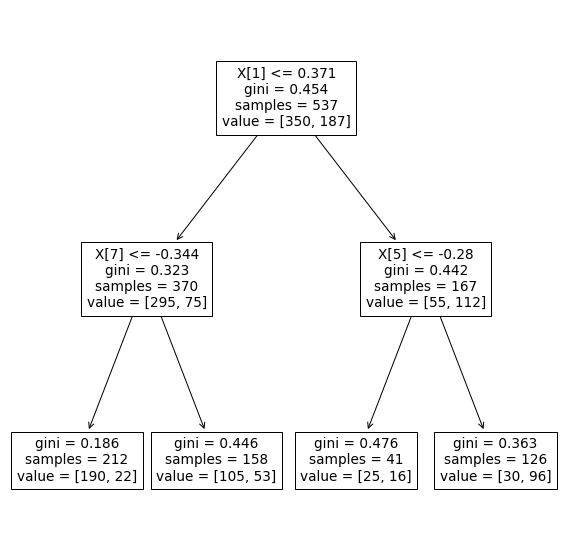

In [6]:
plt.figure(figsize = (10, 10))
tree.plot_tree(model)
plt.savefig("tree.svg")
plt.show()

### 1. Work to improve the model performance for the diabetes decision tree we created in class. You should be able to improve the precision and recall to be above .8 and .7 respectively. You can improve the preprocessing OR alter the model itself.

#### Try GridSearchCV on the original dataset, using accuracy for the scoring

In [52]:
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier(random_state = 42)
params_dt = {'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], 'max_features': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

# instantiate grid search with DecisionTreeClassifier(dt): refit = True by default
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_dt.fit(X_train, y_train)
best_hyperparams = grid_dt.best_params_
print(f'Best hyperparameters: {best_hyperparams}')

Best hyperparameters: {'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 0.06}


In [60]:
best_model = tree.DecisionTreeClassifier(max_depth = 6, max_features = 0.5, min_samples_leaf = 0.06, random_state = 42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

test_accuracy = best_model.score(X_test, y_test)
print(f'Test accuracy of the best model: {test_accuracy:.3f}')

print(classification_report(y_test, y_pred))

Test accuracy of the best model: 0.736
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



#### Or we can do the grid search using recall for the scoring

In [53]:
# instantiate grid search with DecisionTreeClassifier(dt): refit = True by default
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, scoring = 'recall', cv = 10, n_jobs = -1)
grid_dt.fit(X_train, y_train)
best_hyperparams = grid_dt.best_params_
print(f'Best hyperparameters: {best_hyperparams}')

Best hyperparameters: {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.08}


In [59]:
best_model = tree.DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.08, random_state = 42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

test_accuracy = best_model.score(X_test, y_test)

print(f'Test accuracy of the best model: {test_accuracy:.3f}')

print(classification_report(y_test, y_pred))

Test accuracy of the best model: 0.675
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       150
           1       0.53      0.67      0.59        81

    accuracy                           0.68       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.68      0.68       231



#### Or we can select for precision

In [55]:
# instantiate grid search with DecisionTreeClassifier(dt): refit = True by default
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, scoring = 'precision', cv = 10, n_jobs = -1)
grid_dt.fit(X_train, y_train)
best_hyperparams = grid_dt.best_params_
print(f'Best hyperparameters: {best_hyperparams}')

Best hyperparameters: {'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 0.02}


In [58]:
best_model = tree.DecisionTreeClassifier(max_depth = 3, max_features = 0.8, min_samples_leaf = 0.02, random_state = 42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

test_accuracy = best_model.score(X_test, y_test)

print(f'Test accuracy of the best model: {test_accuracy:.3f}')
print(classification_report(y_test, y_pred))

Test accuracy of the best model: 0.706
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       150
           1       0.66      0.33      0.44        81

    accuracy                           0.71       231
   macro avg       0.69      0.62      0.62       231
weighted avg       0.70      0.71      0.67       231



#### These both perform worse than selecting for accuracy. An other thing we can select for are the most important features. First I determine which are the most important.

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300, max_depth = 5, min_samples_leaf = 0.12, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=0.12, n_estimators=300,
                       random_state=42)

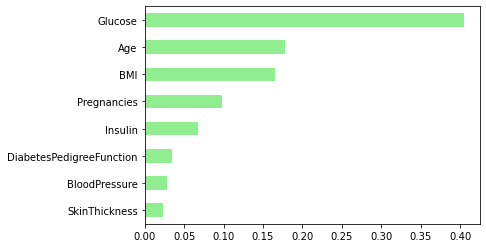

In [14]:
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind = 'barh', color = 'lightgreen')
plt.show()

In [15]:
important_features = ['Glucose', 'Age', 'BMI', 'Pregnancies',  'Insulin']

Let's use only these features:

In [16]:
X = diabetes_df[['Glucose', 'Age', 'BMI', 'Pregnancies',  'Insulin']]
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [62]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_accuracy = model.score(X_test, y_test)
print(f'Test accuracy of the best model: {test_accuracy:.3f}')

Test accuracy of the best model: 0.792


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       150
           1       0.67      0.46      0.54        81

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



These results are about the same as when working with all the features

I also determine the best hyperparameters

In [63]:
from sklearn.model_selection import GridSearchCV

# instantiate grid search with DecisionTreeClassifier(dt): refit = True by default
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, scoring = 'recall', cv = 10, n_jobs = -1)
grid_dt.fit(X_train, y_train)
best_hyperparams = grid_dt.best_params_
print(f'Best hyperparameters: {best_hyperparams}')

Best hyperparameters: {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.08}


In [64]:
best_model = grid_dt.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

print(f'Test accuracy of the best model: {test_accuracy:.3f}')

Test accuracy of the best model: 0.675


In [65]:
best_model = tree.DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.08, random_state = 42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       150
           1       0.53      0.67      0.59        81

    accuracy                           0.68       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.68      0.68       231



#### Looks like it does not really make a difference if we do GridSearchCV on the Original or Restricted Dataset, so maybe let's try to do the whole thing more effectively using RandomizedSearchCV on the original data:

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from random import randint

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

dt = tree.DecisionTreeClassifier()
params_dt = {'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8], 'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random']} 

dt_cv = RandomizedSearchCV(dt, params_dt, cv  = 5)
dt_cv.fit(X_train, y_train)

(RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                    param_distributions={'criterion': ['gini', 'entropy'],
                                         'max_depth': [3, 4, 5, 6],
                                         'max_features': [1, 2, 3, 4, 5, 6, 7,
                                                          8],
                                         'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16, 17,
                                                              18, 19, 20],
                                         'splitter': ['best', 'random']}),)

In [68]:
best_params = dt_cv.best_params_
best_score = dt_cv.best_score_
print(f'Best tuned parameters: {best_params}')
print(f'The best score is: {best_score:.3f}')

Best tuned parameters: {'splitter': 'best', 'min_samples_leaf': 11, 'max_features': 7, 'max_depth': 3, 'criterion': 'entropy'}
The best score is: 0.752


In [69]:
best_model = tree.DecisionTreeClassifier(splitter = 'best', min_samples_leaf = 11, max_features = 7, max_depth = 3, criterion = 'entropy', random_state = 42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.54      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



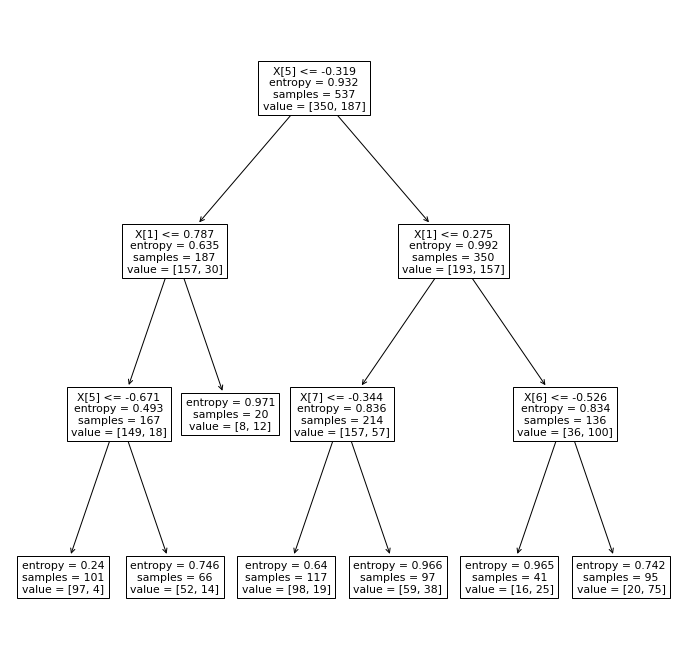

In [71]:
plt.figure(figsize = (12, 12))
tree.plot_tree(best_model)
plt.savefig("tree.svg")
plt.show()

#### Let's check if the sample is balanced

In [85]:
print(diabetes_df['Outcome'].count())
print(diabetes_df['Outcome'].sum())

768
268


The sample is not balanced, let's resample it:

In [86]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#### Use the resampled sample to fit the original model:

In [89]:
model = model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

test_accuracy = model.score(X_test, y_test)
print(f'Test accuracy of the model: {test_accuracy:.3f}')

Test accuracy of the model: 0.779


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.69      0.68      0.68        81

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



#### Also try randomized search with the resampled data:

In [92]:
dt_cv.fit(X_resampled, y_resampled)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7,
                                                         8],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20],
                                        'splitter': ['best', 'random']})

In [93]:
best_params = dt_cv.best_params_
best_score = dt_cv.best_score_
print(f'Best tuned parameters: {best_params}')
print(f'The best score is: {best_score:.3f}')

Best tuned parameters: {'splitter': 'best', 'min_samples_leaf': 19, 'max_features': 7, 'max_depth': 5, 'criterion': 'entropy'}
The best score is: 0.763


In [95]:
best_model = tree.DecisionTreeClassifier(splitter = 'best', min_samples_leaf = 19, max_features = 7, max_depth = 5, criterion = 'entropy', random_state = 42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       150
           1       0.68      0.64      0.66        81

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



This is not any better than the original one. Maybe time to give up?

### 2. Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)

In [ ]:
my_array = [ {'name': 'Nichole'}, {'name': 'Elek'}, {'name': 'Tohotom'},  {'name': 'Tanisha'}, {'name': 'Maggie'} ]

In [ ]:
def list_names(my_array):
    my_string = ''
    for i in range(len(my_array)):
        if i == (len(my_array) - 1):
            my_string = my_string + ' & ' + my_array[i]['name']
        elif i == 0:
            my_string = my_string + my_array[i]['name']
        else:
            my_string = my_string + ', ' + my_array[i]['name']
    return my_string
        

In [ ]:
list_names(my_array)